In [9]:
# imports
import panel as pn
import dash
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv, find_dotenv
import plotnine as p9
import os
import warnings
from scipy import linalg, optimize
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
econ_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'FAOSTAT_food_insecurity.csv')
econ_df = pd.read_csv(econ_path, index_col=['Item', 'Area', 'Year'])
econ_df = econ_df.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Element Code',
                                'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Note', 'Element'],
                      index=['Average value of food production (constant 2004-2006 I$/cap) (3-year average)',
                      'Cereal import dependency ratio (percent) (3-year average)',
                            'Prevalence of undernourishment (percent) (3-year average)',
                            'Percent of arable land equipped for irrigation (percent) (3-year average)',
                            'Percentage of population using at least basic drinking water services (percent)',
                            'Percentage of population using safely managed drinking water services (Percent)'
                            ])
econ_df.head(60)

Unit  \
Item                                               Area          Year             
Gross domestic product per capita, PPP, dissemi... Cameroon      2010        I$   
                                                                 2011        I$   
                                                                 2012        I$   
                                                                 2013        I$   
                                                                 2014        I$   
                                                                 2015        I$   
                                                                 2016        I$   
                                                                 2017        I$   
                                                                 2018        I$   
                                                                 2019        I$   
                                                                 2020        I$   
Value of food imports in total merchandise expo... Cameroon      2009-2011    %   
                                                                 2010-2012    %   
                                                                 2011-2013    %   
                                                                 2012-2014    %   
                                                                 2013-2015    %   
                                                                 2014-2016    %   
                                                                 2015-2017    %   
                                                                 2016-2018    %   
                                                                 2017-2019    %   
Gross domestic product per capita, PPP, dissemi... Côte d'Ivoire 2010        I$   
                                                                 2011        I$   
                                                                 2012        I$   
                                                                 2013        I$   
                                                                 2014        I$   
                                                                 2015        I$   
                                                                 2016        I$   
                                                                 2017        I$   
                                                                 2018        I$   
                                                                 2019        I$   
                                                                 2020        I$   
Value of food imports in total merchandise expo... Côte d'Ivoire 2009-2011    %   
                                                                 2010-2012    %   
                                                                 2011-2013    %   
                                                                 2012-2014    %   
                                                                 2013-2015    %   
                                                                 2014-2016    %   
                                                                 2015-2017    %   
                                                                 2016-2018    %   
                                                                 2017-2019    %   
Gross domestic product per capita, PPP, dissemi... Ecuador       2010        I$   
                                                                 2011        I$   
                                                                 2012        I$   
                                                                 2013        I$   
                                                                 2014        I$   
                                                                 2015        I$   
                                                                 2016        I$   
        

In [43]:
gdp_df = econ_df.drop(index='Value of food imports in total merchandise exports (percent) (3-year average)')
food_import_value_df = econ_df.drop(index='Gross domestic product per capita, PPP, dissemination (constant 2011 international $)')

In [44]:
gdp_df = gdp_df.droplevel(level=0)
gdp_df = gdp_df.drop(columns='Unit')
gdp_df

Value
Area          Year         
Cameroon      2010   3086.2
              2011   3126.8
              2012   3180.8
              2013   3262.8
              2014   3362.7
              2015   3458.7
              2016   3524.4
              2017   3554.5
              2018   3603.5
              2019   3642.3
              2020   3576.3
Côte d'Ivoire 2010   3660.9
              2011   3417.8
              2012   3692.6
              2013   3922.5
              2014   4161.9
              2015   4417.2
              2016   4615.7
              2017   4830.8
              2018   5033.5
              2019   5212.6
              2020   5174.1
Ecuador       2010  10341.0
              2011  10984.3
              2012  11431.4
              2013  11818.6
              2014  12078.5
              2015  11896.4
              2016  11551.6
              2017  11617.9
              2018  11561.7
              2019  11370.6
              2020  10329.2
Ghana         2010   3729.5
              2011   4151.5
              2012   4431.0
              2013   4645.8
              2014   4670.2
              2015   4662.3
              2016   4712.5
              2017   4983.7
              2018   5177.9
              2019   5396.9
              2020   5305.0
Nigeria       2010   4932.3
              2011   5056.9
              2012   5131.4
              2013   5329.1
              2014   5516.4
              2015   5514.8
              2016   5284.9
              2017   5190.4
              2018   5155.1
              2019   5135.5
              2020   4916.7

In [45]:
food_import_value_df = food_import_value_df.droplevel(level=0)
food_import_value_df = food_import_value_df.drop(columns='Unit')
food_import_value_df

Value
Area          Year            
Cameroon      2009-2011   20.0
              2010-2012   20.0
              2011-2013   24.0
              2012-2014   23.0
              2013-2015   23.0
              2014-2016   21.0
              2015-2017   25.0
              2016-2018   25.0
              2017-2019   25.0
Côte d'Ivoire 2009-2011   11.0
              2010-2012   13.0
              2011-2013   13.0
              2012-2014   12.0
              2013-2015   10.0
              2014-2016   11.0
              2015-2017   11.0
              2016-2018   12.0
              2017-2019   12.0
Ecuador       2009-2011    7.0
              2010-2012    6.0
              2011-2013    6.0
              2012-2014    5.0
              2013-2015    6.0
              2014-2016    6.0
              2015-2017    6.0
              2016-2018    6.0
              2017-2019    6.0
Ghana         2009-2011   15.0
              2010-2012   13.0
              2011-2013   13.0
              2012-2014   13.0
              2013-2015   16.0
              2014-2016   16.0
              2015-2017   15.0
              2016-2018   13.0
              2017-2019   12.0
Nigeria       2009-2011    7.0
              2010-2012    6.0
              2011-2013    7.0
              2012-2014    7.0
              2013-2015    9.0
              2014-2016   10.0
              2015-2017   14.0
              2016-2018   13.0
              2017-2019   11.0

<AxesSubplot:title={'center':'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)'}, xlabel='Area,Year', ylabel='Value in I$'>

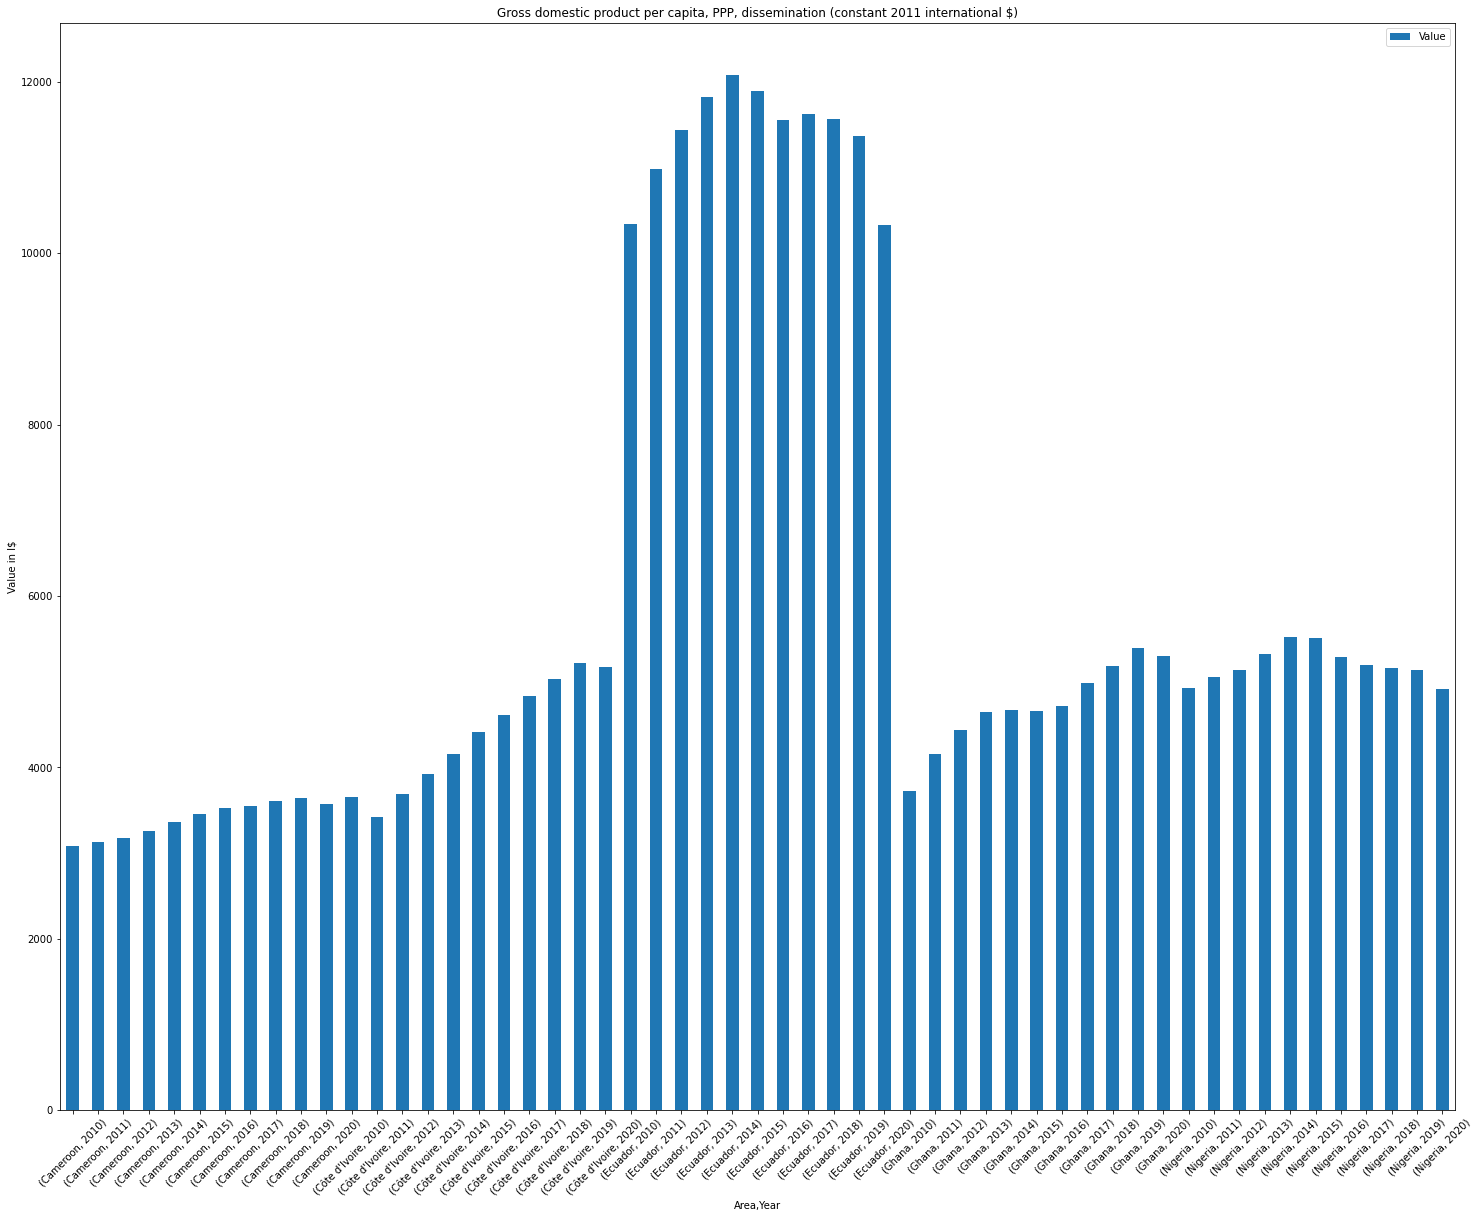

In [49]:
gdp_plot = gdp_df.plot(kind='bar', figsize = (25,20), rot=45, ylabel='Value in I$',
                      title = 'Gross domestic product per capita, PPP, dissemination (constant 2011 international $)')
gdp_plot

<AxesSubplot:title={'center':'Value of food imports in total merchandise exports (%)'}, xlabel='Area,Year', ylabel='%'>

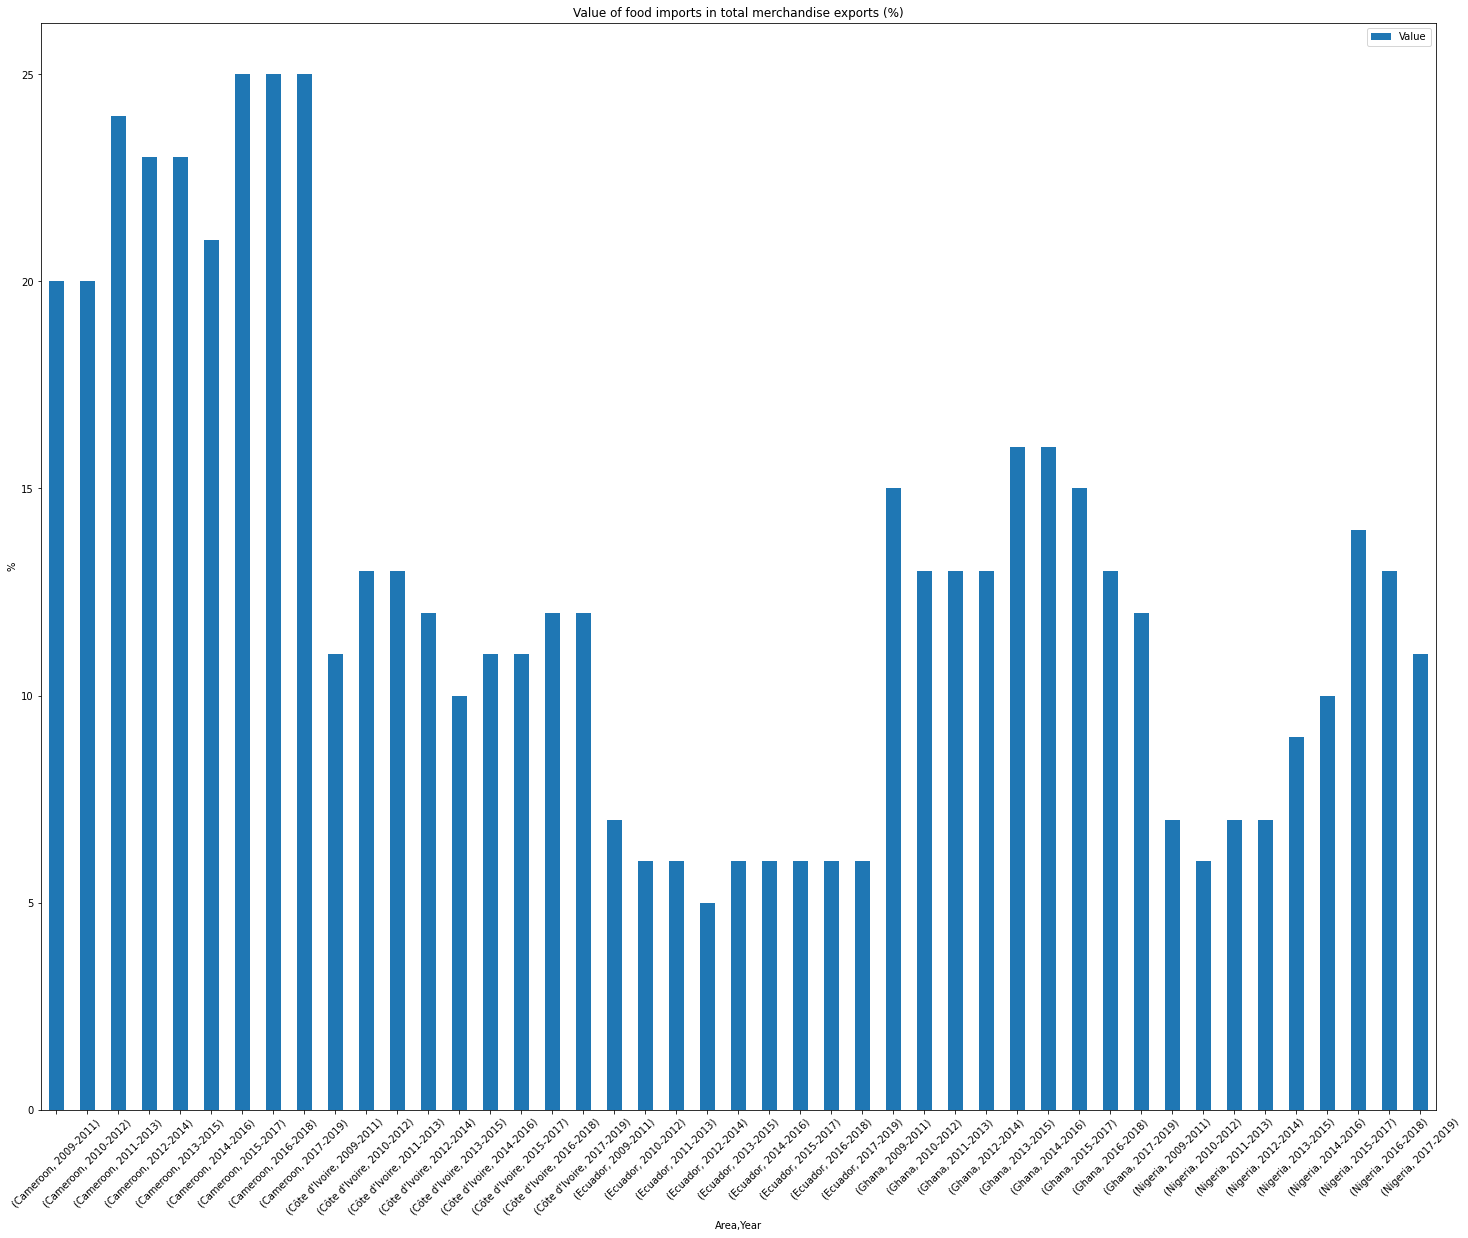

In [52]:
food_import_value_plot = food_import_value_df.plot(kind='bar', figsize=(25,20), rot=45,
                                                   title='Value of food imports in total merchandise exports (%)',
                                                   ylabel = '%')
food_import_value_plot